In [1]:
from mdp import *
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
lexer = gramLexer(FileStream("ex2.mdp")) 
stream = CommonTokenStream(lexer)
parser = gramParser(stream)
tree = parser.program()
saver = gramSaverMDP()
walker = ParseTreeWalker()
walker.walk(saver, tree)
mdp = saver.get_mdp()

In [3]:
print(mdp)


Markovian Decision Process
Actions : ['__epsilonAction__' 'a' 'b' 'c']\States : ['S0' 'S1' 'S2']
Action __epsilonAction__ : 
[[0.5  0.25 0.25]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]
Action a : 
[[0.  0.  0. ]
 [0.3 0.6 0.1]
 [0.5 0.5 0. ]]
Action b : 
[[0.  0.  0. ]
 [0.8 0.2 0. ]
 [0.  0.  0. ]]
Action c : 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [4]:
G = nx.DiGraph()
G.add_nodes_from(mdp.states)
G.add_nodes_from(mdp.actions)
node_sizes = [500 for i in range(len(mdp.states))] + [10 for i in range(len(mdp.actions))]
pos = nx.random_layout(G)

{'a': Text(0.5318263, 0.0991831, 'a'),
 'a_O': Text(0.18353352, 0.89996773, 'a')}

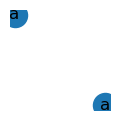

In [5]:
plt.figure(figsize=(1,1))
G = nx.DiGraph()
G.add_node("a")
G.add_node("a_O")
pos = nx.random_layout(G)
nx.draw(G, pos, with_labels=False)
nx.draw_networkx_labels(G, pos, labels={"a":"a", "a_O":"a"})

In [6]:
def labels(G):
    labels = {}
    for node in G.nodes():
        if node in mdp.states:
            labels[node] = node
        elif str(node)[:-1] == mdp.actions[0]:
            labels[node] = ""
        else:
            labels[node] = str(node)[:-1]
    return labels

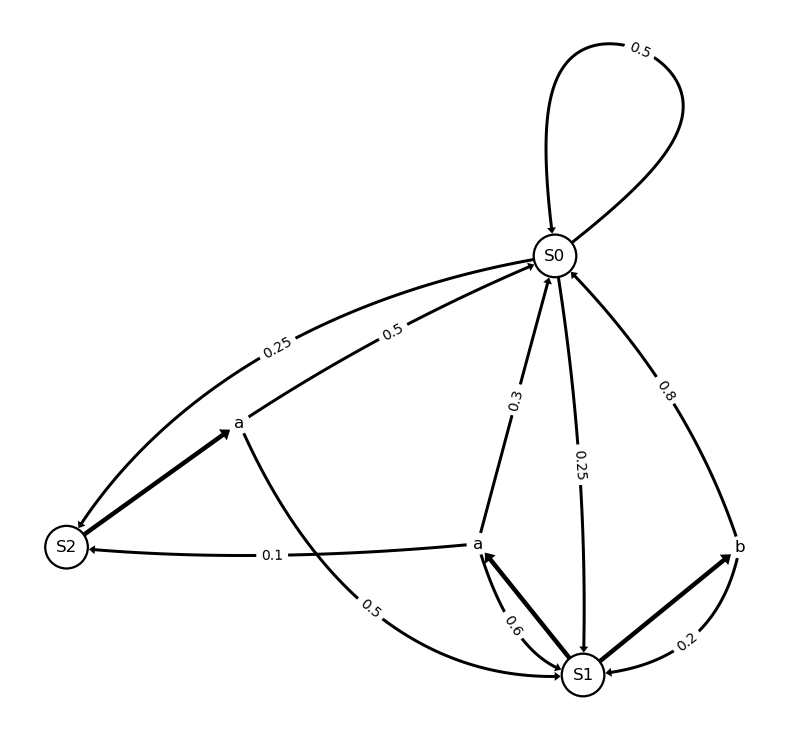

In [184]:
from netgraph import Graph, get_curved_edge_paths, get_fruchterman_reingold_layout

G = nx.DiGraph()
plt.figure(figsize=(10,10))
r = 0.5

edge_labels = {}
edge_weights = {}
edge_width = {}
edge_alpha = {}
node_color = {}
node_size = {}
node_edge_color = {}
node_to_community = {}
curved_edges = []
straight_edges = []
transitions = np.swapaxes(mdp.P, 0, 1)
for ind_etat in range(len(mdp.states)):
    etat = mdp.states[ind_etat]
    G.add_node(etat)
    node_color[etat] = "white"
    node_edge_color[etat] = "black"
    node_size[etat] = 3*r
    node_to_community[etat] = etat
    actions_departing = []
    for ind_action in range(len(mdp.actions)):
        action = mdp.actions[ind_action]
        if np.sum(transitions[ind_etat, ind_action]) > 0:
            if ind_action > 0:
                action_etat = action + str(ind_etat)
                G.add_node(action_etat)
                actions_departing.append(action_etat)
                node_to_community[action_etat] = etat
                node_color[action_etat] = "white"
                node_edge_color[action_etat] = "white"
                node_size[action_etat] = 1.5*r
                G.add_edge(etat, action_etat)
                edge_width[(etat, action_etat)] = 0.6*r
                edge_weights[(etat, action_etat)] = 60
                straight_edges.append((etat, action_etat))
                edge_alpha[(etat, action_etat)] = 1
            else:
                action_etat = etat

            for ind_destination in range(len(mdp.states)):
                destination = mdp.states[ind_destination]
                weight = transitions[ind_etat, ind_action, ind_destination]
                if weight > 0:
                    G.add_edge(action_etat, destination)
                    edge_labels[(action_etat, destination)] = weight
                    if action_etat == etat:
                        edge_weights[(action_etat, destination)] = 1
                    else:
                        edge_weights[(action_etat, destination)] = 20
                    edge_width[(action_etat, destination)] = 0.4*r
                    curved_edges.append((action_etat, destination))
                    edge_alpha[(action_etat, destination)] = 1
    for i in range(len(actions_departing)-1):
        G.add_edge(actions_departing[i], actions_departing[i+1])
        edge_weights[(actions_departing[i], actions_departing[i+1])] = 40
        edge_width[(actions_departing[i], actions_departing[i+1])] = 0.001
        edge_alpha[(actions_departing[i], actions_departing[i+1])] = 0
        straight_edges.append((actions_departing[i], actions_departing[i+1]))

node_layout = get_fruchterman_reingold_layout(list(G.edges), edge_weights=edge_weights, origin=(0.2,0.2), scale=(0.5,0.5))
edge_layout = get_curved_edge_paths(curved_edges, node_positions=node_layout, k=0.05, bundle_parallel_edges=False, selfloop_radius = 0.001)
edge_layout.update(get_curved_edge_paths(straight_edges, node_positions=node_layout, k=0.001))
Graph(G, node_layout=node_layout, 
      edge_width=edge_width, edge_color="black", edge_alpha=edge_alpha, edge_layout=edge_layout, 
      arrows=True,
      node_size=node_size, node_color = node_color, node_edge_color=node_edge_color, node_edge_width=0.3*r,
      node_labels=labels(G), node_label_fontdict=dict(size=12),
      edge_labels=edge_labels);